In [ ]:
import tensorflow as tf
import keras
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense,Input,Flatten,Dropout,SimpleRNN,LSTM,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv")

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
df['prevClose']=df['close'].shift(1)
df['return']=(df['close']-df['prevClose'])/df['prevClose']
df.head()

,date,open,high,low,close,volume,Name,prevClose,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


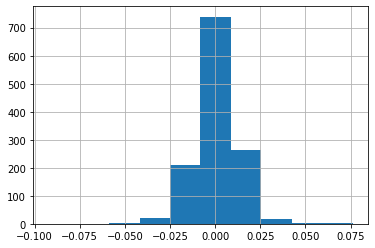

In [ ]:
df['return'].hist()

In [ ]:
series=df['close'].values.reshape(-1,1)
series.shape

(1259, 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
series.shape

(1259,)

In [ ]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1) 
Y=np.array(Y) 
N=len(X)
print(X.shape)
print(Y.shape)

(1249, 10, 1)
(1249,)


In [ ]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.1),
        loss='mse')

r=model.fit(X[:-N//2], Y[:-N//2], 
            validation_data=(X[ -N //2 :],Y[-N//2:]),
            epochs=80)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 3s 35ms/step - loss: 0.2370 - val_loss: 0.2101
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0129 - val_loss: 0.0273
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0353
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.0064 - val_loss: 0.0248
Epoch 5/80
20/20 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0300
Epoch 6/80
20/20 [==============================] - 0s 20ms/step - loss: 0.0058 - val_loss: 0.0265
Epoch 7/80
20/20 [==============================] - 0s 17ms/step - loss: 0.0060 - val_loss: 0.0320
Epoch 8/80
20/20 [==============================] - 0s 14ms/step - loss: 0.0070 - val_loss: 0.0433
Epoch 9/80
20/20 [==============================] - 0s 19ms/step - loss: 0.0062 - val_loss: 0.0321
Epoch 10/80
20/20 [==============================] - 0s 22ms/step - loss: 0.0067 - val_loss: 0.0292
Epoch 11/80
20/20 [====

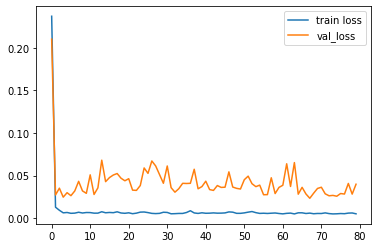

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

In [ ]:
validation_target=Y[-N//2:]

validation_prediction=[]
last_x=X[-N//2]

while len(validation_prediction)<len(validation_target):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  validation_prediction.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

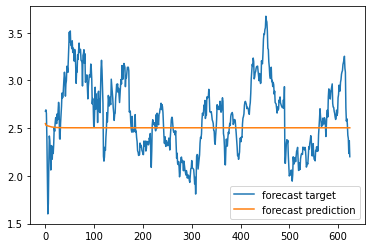

In [ ]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_prediction,label='forecast prediction')
plt.legend()

In [ ]:
series=df['return'].values.reshape(-1,1)
series.shape

(1259, 1)

In [ ]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()
series.shape

(1259,)

In [ ]:
T=10
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X=np.array(X).reshape(-1,T,1) 
Y=np.array(Y) 
N=len(X)
print(X.shape)
print(Y.shape)

(1249, 10, 1)
(1249,)


In [ ]:
i=Input(shape=(T,1))
x=LSTM(5)(i)
x=Dense(1)(x)
model=Model(i,x)

model.compile(optimizer=tf.optimizers.Adam(lr=0.01),
        loss='mse') 

r=model.fit(X[1:-N//2], Y[1:-N//2], 
            validation_data=(X[ -N //2 :],Y[-N//2:]),
            epochs=80)

Epoch 1/80
20/20 [==============================] - 2s 33ms/step - loss: 0.9981 - val_loss: 1.1618
Epoch 2/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9906 - val_loss: 1.1554
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9910 - val_loss: 1.1467
Epoch 4/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9892 - val_loss: 1.1559
Epoch 5/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9901 - val_loss: 1.1490
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9885 - val_loss: 1.1700
Epoch 7/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9854 - val_loss: 1.1533
Epoch 8/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9858 - val_loss: 1.1491
Epoch 9/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9856 - val_loss: 1.1654
Epoch 10/80
20/20 [==============================] - 0s 9ms/step - loss: 0.9852 - val_loss: 1.1637
Epoch 11/80
20/20 

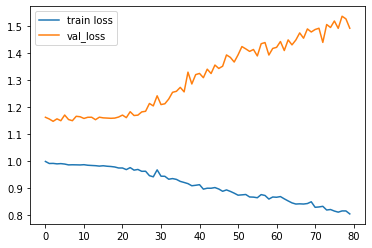

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

In [ ]:
validation_target=Y[-N//2:]

validation_prediction=[]
last_x=X[-N//2]

while len(validation_prediction)<len(validation_target):
  p=model.predict(last_x.reshape(1,T,1))[0,0]
  validation_prediction.append(p)

  last_x=np.roll(last_x,-1)
  last_x[-1]=p

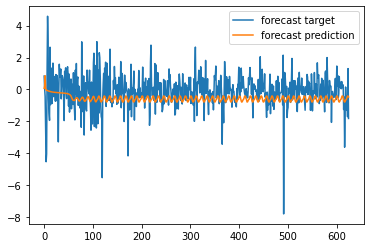

In [ ]:
plt.plot(validation_target,label='forecast target')
plt.plot(validation_prediction,label='forecast prediction')
plt.legend()

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,prevClose,return,der
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,1
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,0
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,1
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,0
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,1


In [ ]:
columns=['open','high','low','close','volume']

In [ ]:
input_data=df[columns].values
target=df['return']

In [ ]:
T=10
D=5
N=len(input_data)-T

print("T:",T," D:",D," N:",N)

T: 10  D: 5  N: 1249


In [ ]:
Ntrain=len(input_data) * 2 // 3 
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain+T])
input_data=scaler.transform(input_data)

In [ ]:
X_train=np.zeros((Ntrain,T,D))
Y_train=np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t,:,:]=input_data[t:t+T]
  Y_train[t]=(target[t+T]<0)
  

In [ ]:
X_test=np.zeros((N-Ntrain,T,D))
Y_test=np.zeros(N-Ntrain)

for u in range(N-Ntrain):
  t=u+Ntrain  
  X_test[u,:,:]=input_data[t:t+T]
  Y_test[u]=(target[t+T]<0)


In [ ]:
i=Input(shape=(T,D))
x=LSTM(50)(i)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

r = model.fit(
    X_train, Y_train,
    validation_data=(X_test,Y_test),
    epochs=300,
    batch_size=32
)


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


27/27 [==============================] - 3s 26ms/step - loss: 0.6982 - accuracy: 0.4994 - val_loss: 0.7478 - val_accuracy: 0.4902
Epoch 2/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6924 - accuracy: 0.5244 - val_loss: 0.7480 - val_accuracy: 0.4902
Epoch 3/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6910 - accuracy: 0.5280 - val_loss: 0.7810 - val_accuracy: 0.4902
Epoch 4/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.5542 - val_loss: 0.7809 - val_accuracy: 0.4902
Epoch 5/300
27/27 [==============================] - 0s 9ms/step - loss: 0.6884 - accuracy: 0.5483 - val_loss: 0.7489 - val_accuracy: 0.4902
Epoch 6/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6906 - accuracy: 0.5328 - val_loss: 0.7517 - val_accuracy: 0.4902
Epoch 7/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6923 - accuracy: 0.5149 - val_loss: 0.7237 - val_accuracy: 0.4902
Epoch 8/300
27/27 [=====

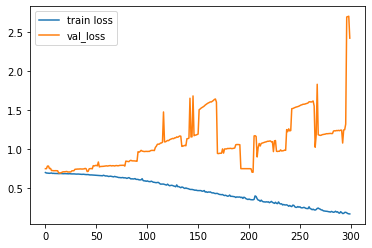

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

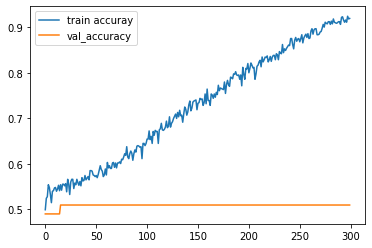

In [ ]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()